In [1]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems
from nilmtk.utils import print_dict

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils
# 读取数据
dataset = DataSet('./dataset/redd.h5')

In [36]:
# 数据记录的多少building的数据
buildings=dataset.buildings

MeterGroup(meters=
  ElecMeter(instance=1, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=6, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=6, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=5, building=6, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=6, dataset='REDD', appliances=[Appliance(type='CE appliance', instance=1)])
  ElecMeter(instance=7, building=6, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=8, building=6, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=9, building=6, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=6, dataset='REDD', appliances=[Appliance(

In [5]:
#每个building记录的家用电器的种类
for k,v in buildings.items():
    elec=v.elec
    for meter in elec.submeters().meters:
        print(meter.label())


Fridge
Dish washer
Sockets
Sockets
Light
Microwave
Unknown
Electric space heater
Electric stove
Sockets
Sockets
Light
Light
Unknown
Electric oven
Washer dryer
Sockets
Light
Electric stove
Microwave
Washer dryer
Sockets
Fridge
Dish washer
Waste disposal unit
Sockets
Sockets
Light
CE appliance
Fridge
Waste disposal unit
Dish washer
Electric furnace
Light
Sockets
Light
Microwave
Light
Smoke alarm
Light
Unknown
Sockets
Sockets
Washer dryer
Light
Electric furnace
Sockets
Sockets
Washer dryer
Electric stove
Unknown
Smoke alarm
Light
Sockets
Dish washer
Unknown
Unknown
Light
Light
Air conditioner
Air conditioner
Microwave
Light
Sockets
Electric furnace
Sockets
Subpanel
Subpanel
Light
Sockets
Unknown
Light
Fridge
Light
Dish washer
Waste disposal unit
CE appliance
Light
Sockets
Sockets
Sockets
Washer dryer
Electric space heater
Sockets
Washer dryer
Electric stove
CE appliance
Unknown
Fridge
Dish washer
Sockets
Sockets
Electric space heater
Sockets
Light
Air handling unit
Air conditioner


In [14]:

#获取building1所有电器的标签
elec=dataset.buildings[1].elec
labelList=elec.label().split(', ')
labelList

['Site meter',
 'Washer dryer',
 'Microwave',
 'Sockets',
 'Light',
 'Electric oven',
 'Electric stove',
 'Electric space heater',
 'Unknown',
 'Dish washer',
 'Fridge']

In [16]:
# 获取每个building共同记录的电器数据
label_dict = {}
for k,building in buildings.items():
    elec=building.elec
    list=[]
    for meter in elec.submeters().meters:
        list.append(meter.label())
    label_dict["building"+str(k)]=list
comLabel=[]
for label in labelList:
    flag=True
    n=1
    for value in label_dict.values():
        if label not in value:
            flag=False
            break  
    if flag:
        comLabel.append(label)
        
comLabel  

['Washer dryer', 'Sockets', 'Light', 'Dish washer']

In [25]:
# 每个building数据开始记录的时间
for i in range(len(buildings)):
    meter_group = buildings[i+1].elec
    print(meter_group.get_timeframe())



TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-05-24 15:57:02-04:00', empty=False)
TimeFrame(start='2011-04-17 19:18:27-04:00', end='2011-05-22 19:59:16-04:00', empty=False)
TimeFrame(start='2011-04-16 01:11:27-04:00', end='2011-05-30 20:19:54-04:00', empty=False)
TimeFrame(start='2011-04-16 21:16:19-04:00', end='2011-06-03 20:45:45-04:00', empty=False)
TimeFrame(start='2011-04-18 00:24:03-04:00', end='2011-05-31 20:20:20-04:00', empty=False)
TimeFrame(start='2011-05-21 15:39:19-04:00', end='2011-06-14 01:31:44-04:00', empty=False)


In [29]:
#设置读取数据的时间范围
dataset.set_window(start="2011-04-20",end="2011-5-20")

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
physical_quantity               power
type                         apparent
2011-04-20 00:00:00-04:00  171.529999
2011-04-20 00:00:01-04:00  173.229996
2011-04-20 00:00:02-04:00  172.889999
2011-04-20 00:00:03-04:00  172.769989
2011-04-20 00:00:04-04:00  172.550003
...                               ...
2011-05-19 23:59:55-04:00         NaN
2011-05-19 23:59:56-04:00         NaN
2011-05-19 23:59:57-04:00         NaN
2011-05-19 23:59:58-04:00         NaN
2011-05-19 23:59:59-04:00         NaN

[2592000 rows x 1 columns]
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
physical_quantity               power
type                         apparent
2011-04-20 00:00:00-04:00  280.380005
2011-04-20 00:00:01-04:00  279.700012
2011-04-20 00:00:02-04:00  279.549988
2011-04-20 00:00:03-04:00  279.979980


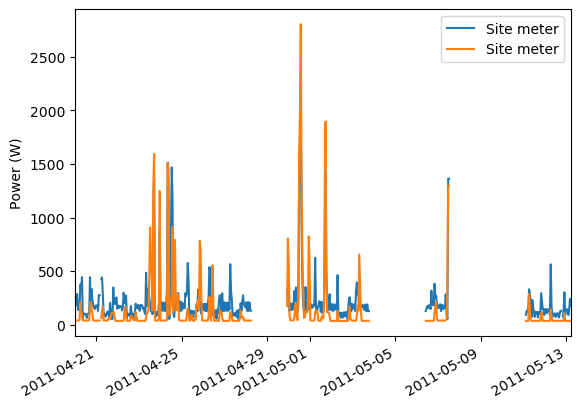

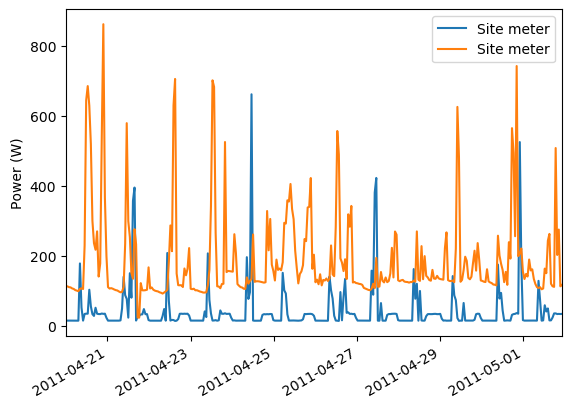

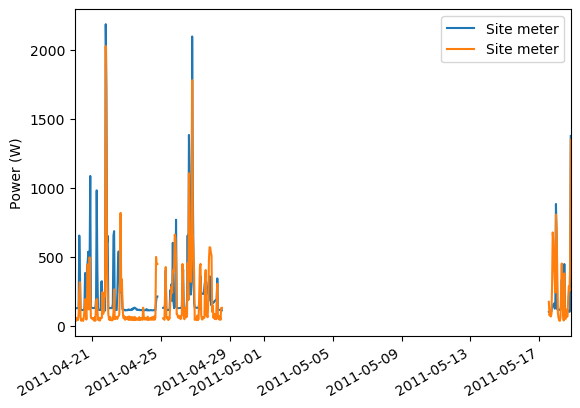

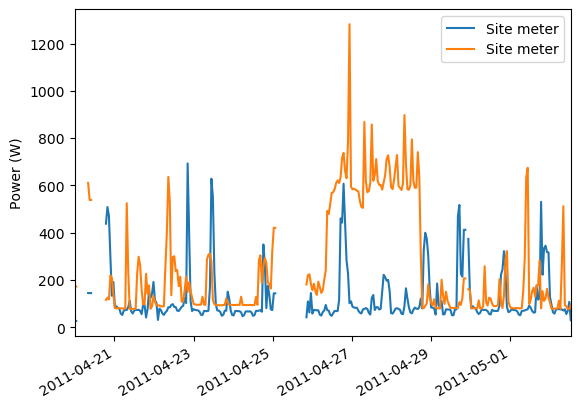

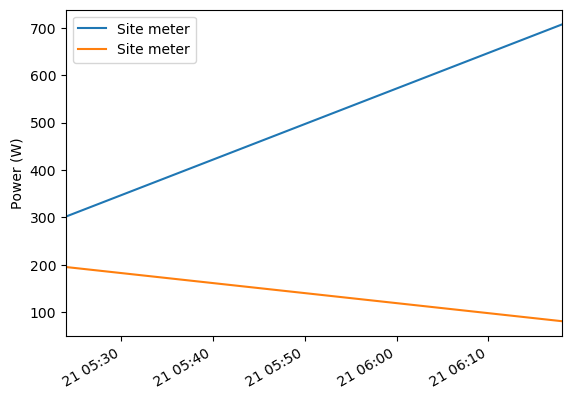

In [39]:
#绘制前5个building的总功率图
for i in range(5):
    elec_meter_group = buildings[i+1].elec
    mains_meter=elec_meter_group.mains()
    plt.figure(i+1)
    mains_meter.plot()
    main_df = next(mains_meter.load())
    print(main_df)

Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
physical_quantity               power
type                         apparent
2011-05-21 15:39:19-04:00  294.239990
2011-05-21 15:39:20-04:00  294.239990
2011-05-21 15:39:21-04:00  292.760010
2011-05-21 15:39:22-04:00  299.010010
2011-05-21 15:39:23-04:00  299.010010
...                               ...
2011-06-14 01:31:39-04:00  220.130005
2011-06-14 01:31:40-04:00  221.229996
2011-06-14 01:31:41-04:00  221.229996
2011-06-14 01:31:42-04:00  216.360001
2011-06-14 01:31:43-04:00         NaN

[2022745 rows x 1 columns]


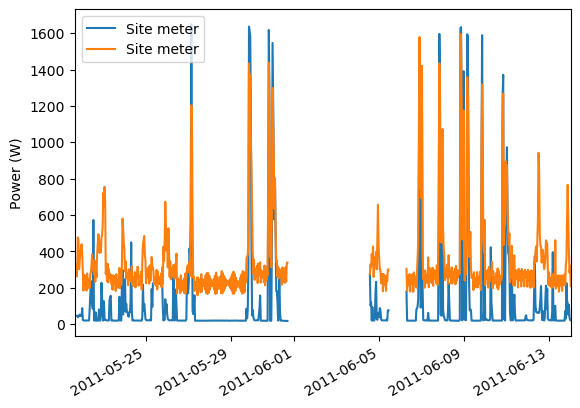

In [46]:
# 设置时间,读取第六个建筑的数据
dataset.set_window(start="2011-05-20",end="2011-6-20")
elec_meter_group = buildings[6].elec
mains_meter=elec_meter_group.mains()
mains_meter.plot()
main_df = next(mains_meter.load())
print(main_df)

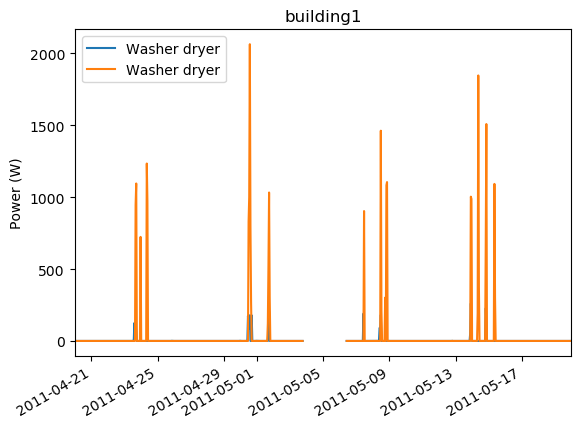

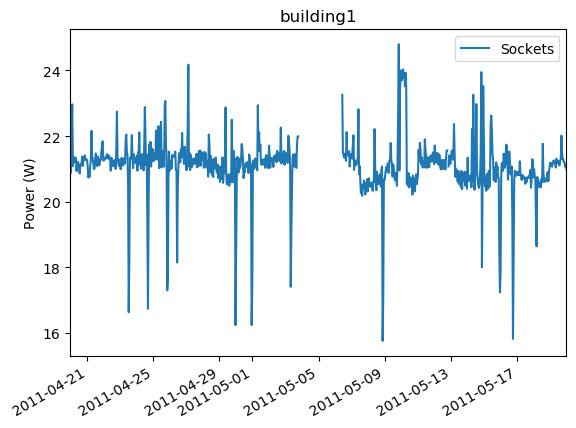

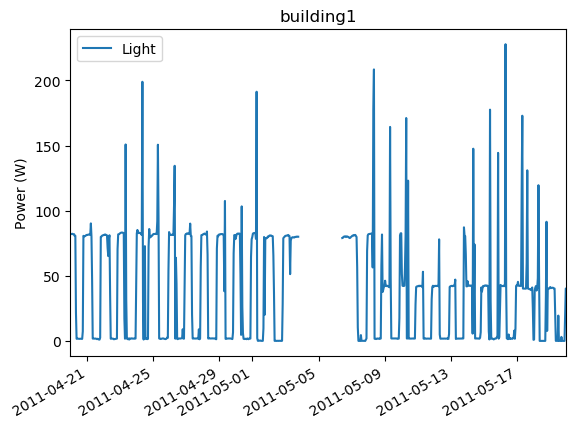

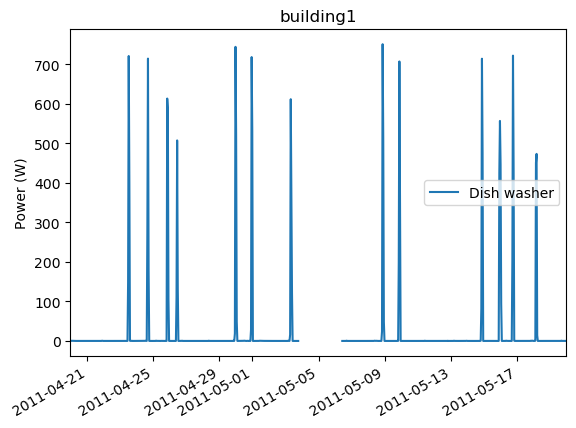

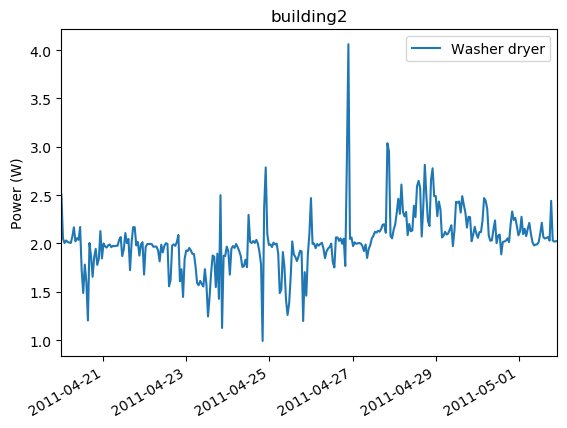

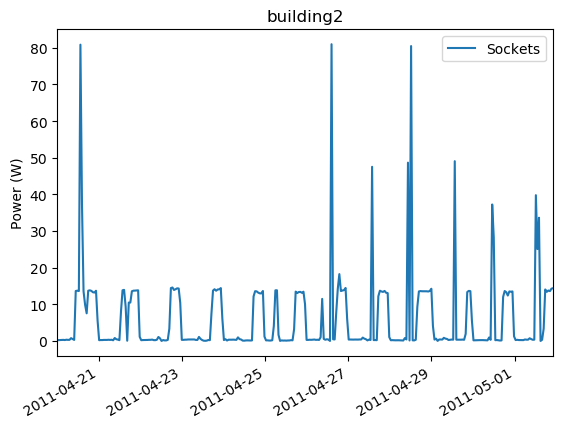

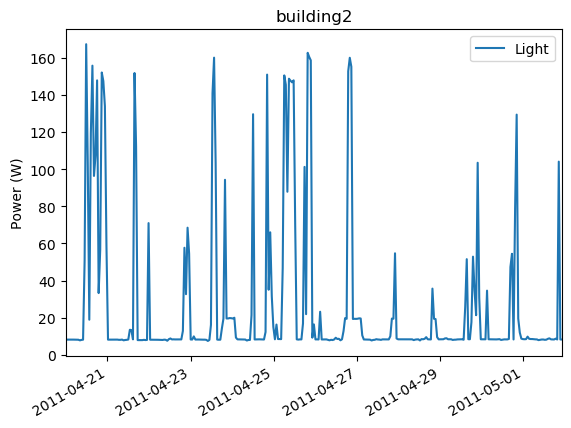

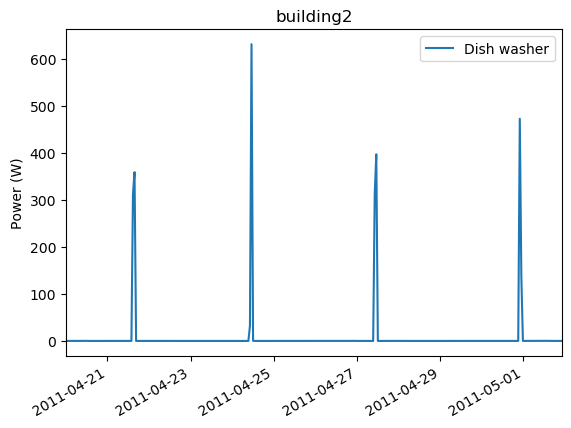

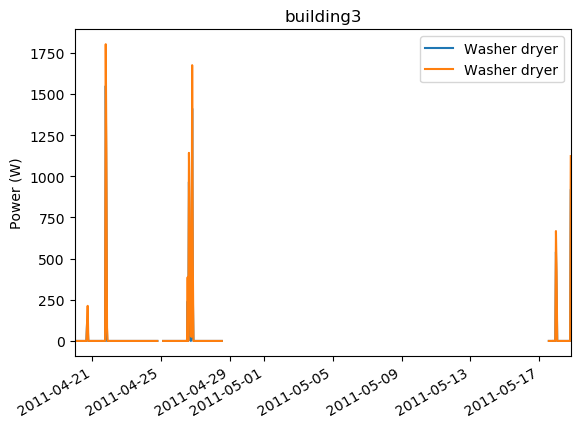

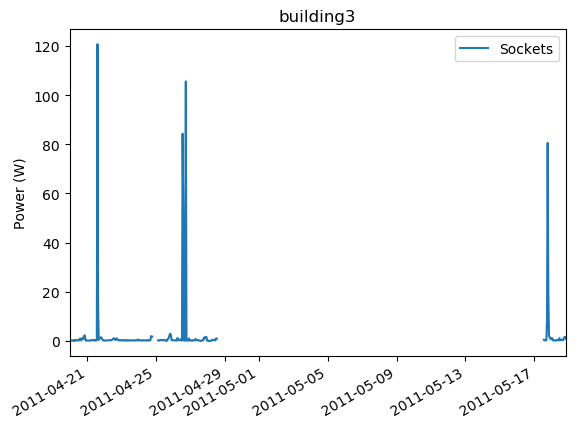

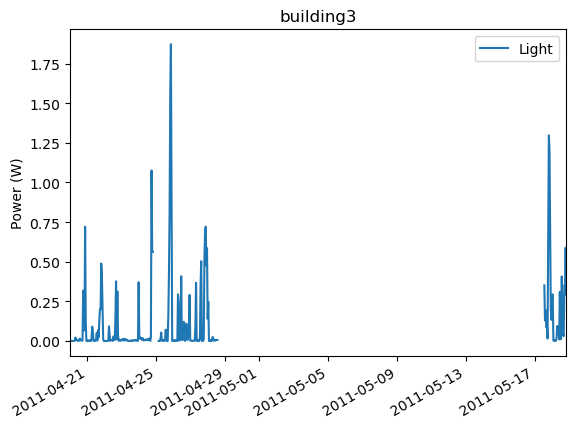

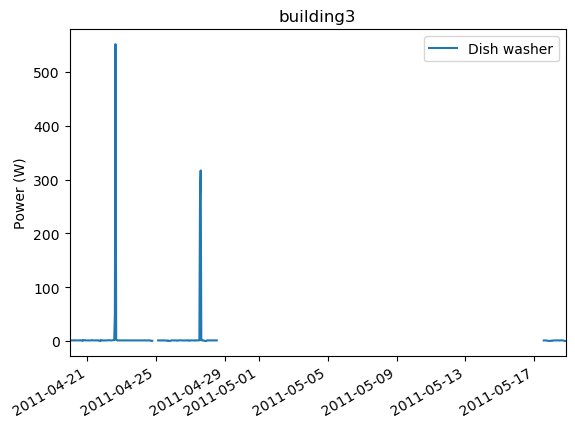

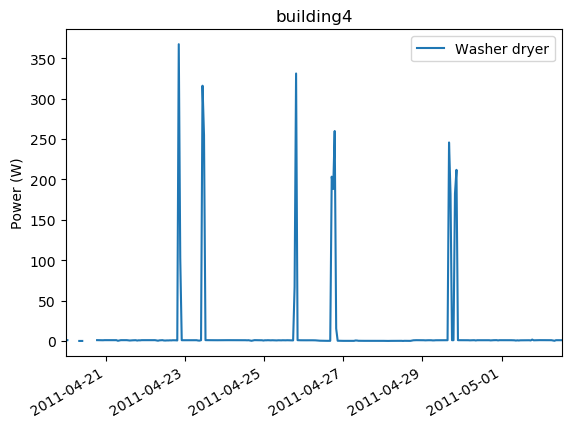

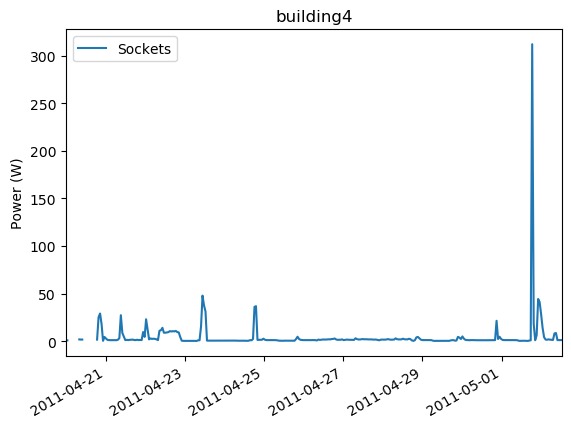

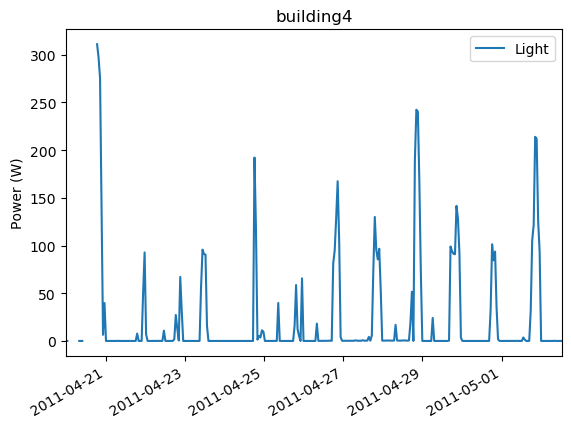

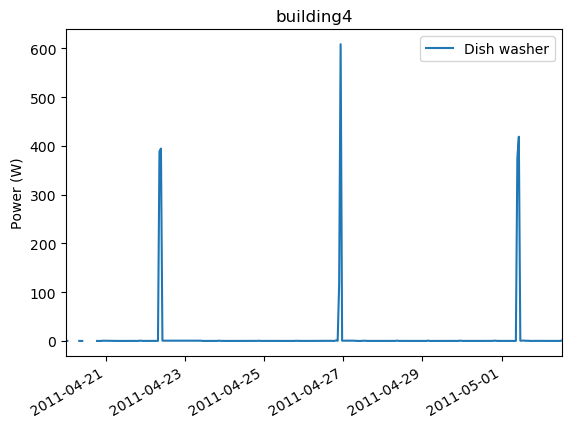

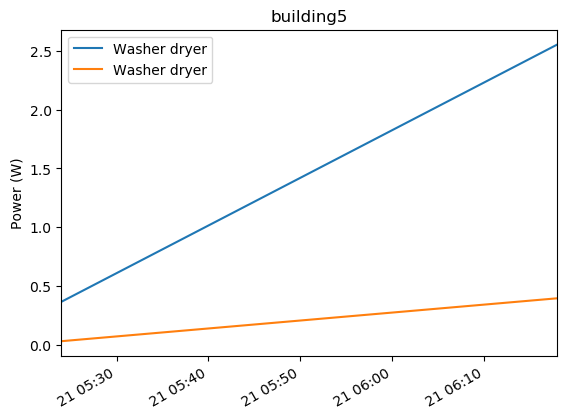

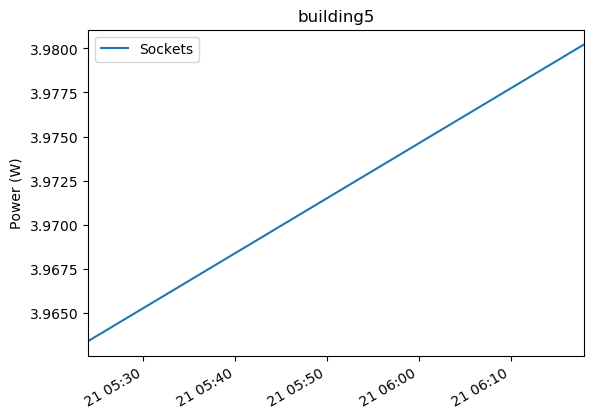

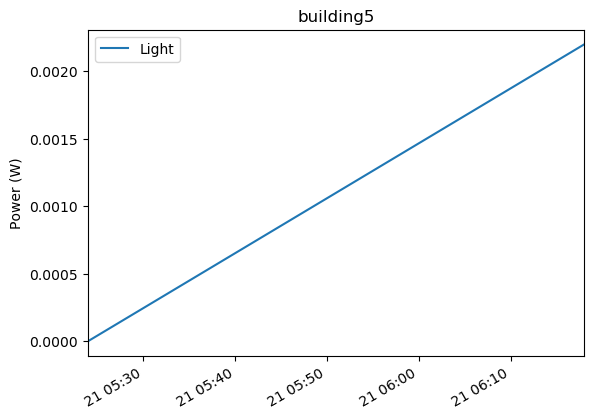

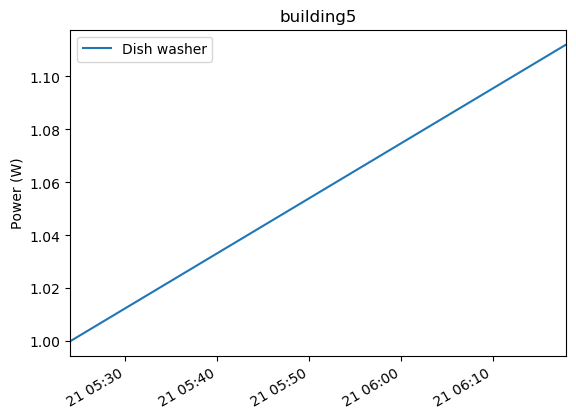

In [48]:
#设置读取数据的时间范围,绘制每个building共同记录电器的功效图
dataset.set_window(start="2011-04-20",end="2011-5-20")
n=1
for i in range(5):
    for label in comLabel:
        plt.figure(n)
        n=n+1
        appliElec=buildings[i+1].elec[label.lower()]
        appliElec.plot()
        plt.title('building'+str(i+1))  # 设置标题文本

In [51]:
#输出未填充的数据,采样时间设置为6s
sample_period=6
for i in range(5):
    for label in comLabel:
        appliElec=buildings[i+1].elec[label.lower()]
        appli_df = next(appliElec.load(sample_period=sample_period,resample=True ))
        appli_df.index = appli_df.index.tz_localize(None)
        print(appli_df)


Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
physical_quantity    power
type                active
2011-04-20 00:00:00    0.0
2011-04-20 00:00:06    0.0
2011-04-20 00:00:12    0.0
2011-04-20 00:00:18    0.0
2011-04-20 00:00:24    0.0
...                    ...
2011-05-19 23:59:30    0.0
2011-05-19 23:59:36    0.0
2011-05-19 23:59:42    0.0
2011-05-19 23:59:48    0.0
2011-05-19 23:59:54    0.0

[432000 rows x 1 columns]
physical_quantity    power
type                active
2011-04-20 00:00:00   20.5
2011-04-20 00:00:06   23.0
2011-04-20 00:00:12   23.0
2011-04-20 00:00:18   24.0
2011-04-20 00:00:24   24.0
...                    ...
2011-05-19 23:59:30   20.0
2011-05-19 23:59:36   20.0
2011-05-19 23:59:42   20.0
2011-05-19 23:59:48   21.5
2011-05-19 23:59:54   20.0

[432000 rows x 1 columns]
physical_quantity    power
type                active
2011-04-20 00:00:00   81.0
2011-04-20 00:00:06   81.5
2011-04-20

In [54]:
#填充后的数据

# 定义采样频率、开始时间和结束时间
sample_frequency = '6S'  # 6s的频率
start_time = '2011-04-20 00:00:00'  # 开始时间
end_time = "2011-05-19 23:59:54"    # 结束时间
# 创建一个字典，包含5个空的DataFrame
dataframeArr = []
for i in range(5):
    gt=[]
    for label in comLabel:
        appliElec=buildings[i+1].elec[label.lower()]
        appli_df = next(appliElec.load(sample_period=6,resample=True ))
        # 移除时间索引的时区信息
        appli_df.index = appli_df.index.tz_localize(None)
        
        # 定义新的时间索引（移除时区信息）
        new_time_index = pd.date_range(start=start_time, end=end_time, freq=sample_frequency)
        # # 使用 reindex 方法将 NILMTK DataFrame 重新索引到新的时间索引，并用 NaN 填充缺失的值
        df_filled = appli_df.reindex(new_time_index)
        df_filled.columns= [label]
        print(df_filled)
        gt.append(df_filled)
    
    # 使用concat将它们按列连接
    dataframeArr.append(pd.concat(gt,axis=1))

Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
                     Washer dryer
2011-04-20 00:00:00           0.0
2011-04-20 00:00:06           0.0
2011-04-20 00:00:12           0.0
2011-04-20 00:00:18           0.0
2011-04-20 00:00:24           0.0
...                           ...
2011-05-19 23:59:30           0.0
2011-05-19 23:59:36           0.0
2011-05-19 23:59:42           0.0
2011-05-19 23:59:48           0.0
2011-05-19 23:59:54           0.0

[432000 rows x 1 columns]
                     Sockets
2011-04-20 00:00:00     20.5
2011-04-20 00:00:06     23.0
2011-04-20 00:00:12     23.0
2011-04-20 00:00:18     24.0
2011-04-20 00:00:24     24.0
...                      ...
2011-05-19 23:59:30     20.0
2011-05-19 23:59:36     20.0
2011-05-19 23:59:42     20.0
2011-05-19 23:59:48     21.5
2011-05-19 23:59:54     20.0

[432000 rows x 1 columns]
                     Light
2011-04-20 00:00:00   81.0
2011-04-20

In [56]:
# 每个building的数据组成一个dataframe
dataframeArr

[                     Washer dryer  Sockets  Light  Dish washer
 2011-04-20 00:00:00           0.0     20.5   81.0          0.0
 2011-04-20 00:00:06           0.0     23.0   81.5          0.0
 2011-04-20 00:00:12           0.0     23.0   81.5          0.0
 2011-04-20 00:00:18           0.0     24.0   81.0          0.0
 2011-04-20 00:00:24           0.0     24.0   81.5          0.0
 ...                           ...      ...    ...          ...
 2011-05-19 23:59:30           0.0     20.0   40.0          0.0
 2011-05-19 23:59:36           0.0     20.0   40.0          0.0
 2011-05-19 23:59:42           0.0     20.0   41.0          0.0
 2011-05-19 23:59:48           0.0     21.5   40.0          0.0
 2011-05-19 23:59:54           0.0     20.0   40.0          0.0
 
 [432000 rows x 4 columns],
                      Washer dryer  Sockets  Light  Dish washer
 2011-04-20 00:00:00           1.0      0.0    9.0          0.0
 2011-04-20 00:00:06           2.0      0.0    9.0          0.0
 2011-04-2

In [55]:
#将多个dataframe堆叠成三阶tensor

# 使用列表解析将 DataFrame 转换为 NumPy 数组
arrays = [df.to_numpy() for df in dataframeArr]

# 将多个数组堆叠成一个张量（多维数组）
tensor = np.stack(arrays, axis=0)

# 打印张量的形状
print(tensor.shape)
tensor


(5, 432000, 4)


array([[[ 0. , 20.5, 81. ,  0. ],
        [ 0. , 23. , 81.5,  0. ],
        [ 0. , 23. , 81.5,  0. ],
        ...,
        [ 0. , 20. , 41. ,  0. ],
        [ 0. , 21.5, 40. ,  0. ],
        [ 0. , 20. , 40. ,  0. ]],

       [[ 1. ,  0. ,  9. ,  0. ],
        [ 2. ,  0. ,  9. ,  0. ],
        [ 2. ,  0. ,  9. ,  0. ],
        ...,
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]],

       [[ 0. ,  0. ,  0. ,  1. ],
        [ 0. ,  0. ,  0. ,  1. ],
        [ 0. ,  0. ,  0. ,  1. ],
        ...,
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]],

       [[ 1. ,  1. ,  0. ,  1. ],
        [ 1. ,  0.5,  0. ,  0. ],
        [ 1. ,  1. ,  0. ,  0. ],
        ...,
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]],

       [[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ...,
        [